# Predictive Model for Car Price
Geely Auto is a Chinese automobile company that is aspiring to enter the US market by setting
up a manufacturing unit in the United States to produce cars locally to compete with its US and
European competitors. The objective of this analysis is to help Geely Auto identify the factors that affect
car prices in the American market, as those factors may differ from the Chinese market.

## Project Plan

Make a hypothesis about a correlation in a dataset and test the hypothesis using a statistical inference technique.

Build a predictive model using multiple linear regression.

1. Explore and clean data
2. Visualisation 
3. Data processing
4. Model Building
5. Model analysis and improvement

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
sns.set(style='darkgrid')
from scipy import stats
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load data

In [104]:
df = pd.read_csv('datasets_383055_741735_CarPrice_Assignment.csv')
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


## Explore Data

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
df.duplicated().any()

False

In [6]:
df.isnull().sum().sort_values(ascending=False)

price               0
highwaympg          0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
car_ID              0
dtype: int64

In [7]:
desc = df.describe()
desc.loc['Kurt'] = df.kurtosis()
desc.loc['Skew'] = df.skew()
desc.T

,count,mean,std,min,25%,50%,75%,max,Kurt,Skew
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00,-1.200000,0.000000
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00,-0.676271,0.211072
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90,1.017039,1.050214
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10,-0.082895,0.155954
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30,0.702764,0.904003
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80,-0.443812,0.063123
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00,-0.042854,0.681398
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00,5.305682,1.947655
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94,-0.785042,0.020156
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17,2.174396,-0.689705


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


---------------------------------------------------------------------------
Highest correlation


highwaympg  citympg       0.971337
curbweight  carlength     0.877728
carlength   wheelbase     0.874587
price       enginesize    0.874145
curbweight  carwidth      0.867032
enginesize  curbweight    0.850594
carwidth    carlength     0.841118
price       curbweight    0.835305
horsepower  enginesize    0.809769
price       horsepower    0.808139
carwidth    wheelbase     0.795144
curbweight  wheelbase     0.776386
price       carwidth      0.759325
horsepower  curbweight    0.750739
enginesize  carwidth      0.735433
            carlength     0.683360
price       carlength     0.682920
boreratio   curbweight    0.648480
horsepower  carwidth      0.640732
boreratio   carlength     0.606454
carheight   wheelbase     0.589435
boreratio   enginesize    0.583774
price       wheelbase     0.577816
horsepower  boreratio     0.573677
enginesize  wheelbase     0.569329
boreratio   carwidth      0.559150
price       boreratio     0.553173
horsepower  carlength     0.552623
wheelbase   symbolin

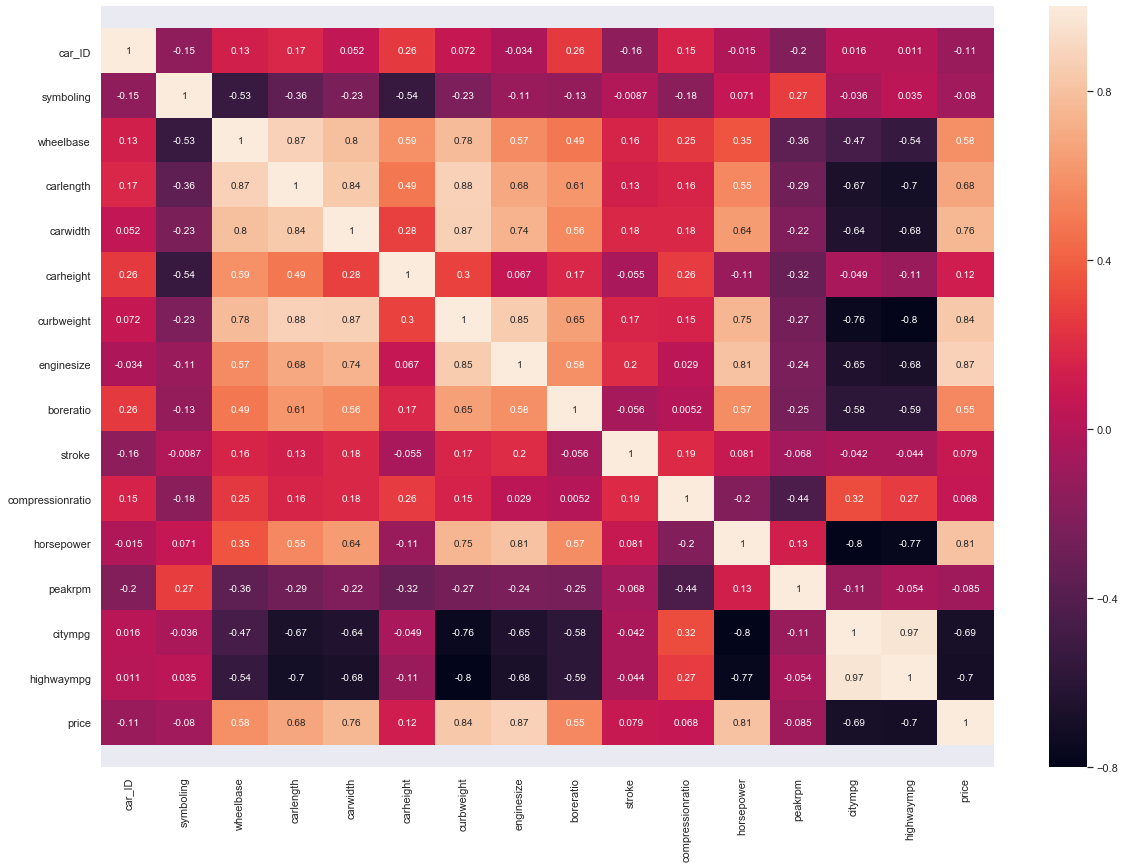

In [8]:
def ExploreCorrelation(df, significance, corr_map=False, cor_table=False):
    corr = df.corr()
    
    #Display correlation table
    if(cor_table): 
        display(corr)
    
    #Correlation heatmap
    if(corr_map):
        plt.figure(figsize=(20,14))
        ax = sns.heatmap(corr, annot=True) #notation: "annot" not "annote"
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    
    print('-'*75)
    print('Highest correlation')
    
    
    #Filter significant correlation in upper triangle of the table 
    
    # remove values below index with NAN and then replace NAN with 0
    corr_upper = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
    corr_upper = corr_upper.fillna(0)
    
    #unstack and sort dataframe
    corr_unstack = corr_upper.unstack()
    corr_sorted = corr_unstack.sort_values(kind="quicksort", ascending=False)
    #filter correlation by signifiance       
    corr_result = corr_sorted[((corr_sorted.values <1) & (corr_sorted.values >significance)) | (corr_sorted.values <-significance)]
    
    #Display all results
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(corr_result)
    
ExploreCorrelation(df,0.5, True, True)

- carwidth , carlength, curbweight ,enginesize and horsepower show poitive correlation with price.

- citympg and highwaympg  have a significant negative correlation with price.

In [9]:
def CategoricalDescribe(df):   
    
    cat_describe = df.astype('object').describe()
    cat_describe.loc['percent'] = 100*cat_describe.loc['freq'] / cat_describe.loc['count']
    display(cat_describe.T)
    
CategoricalDescribe(df)

,count,unique,top,freq,percent
car_ID,205,205,205,1,0.487805
symboling,205,6,0,67,32.6829
CarName,205,147,peugeot 504,6,2.92683
fueltype,205,2,gas,185,90.2439
aspiration,205,2,std,168,81.9512
doornumber,205,2,four,115,56.0976
carbody,205,5,sedan,96,46.8293
drivewheel,205,3,fwd,120,58.5366
enginelocation,205,2,front,202,98.5366
wheelbase,205,53,94.5,21,10.2439


## Data Cleaning

In [10]:
df.drop('car_ID', axis = 1, inplace = True)

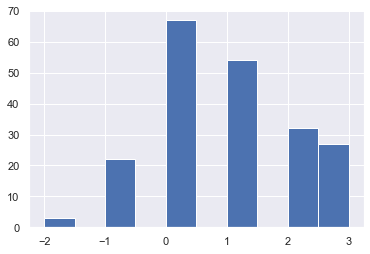

In [11]:
# symboling is a categorical variable
df['symboling'].hist() 
df['symboling']= df['symboling'].astype(str)

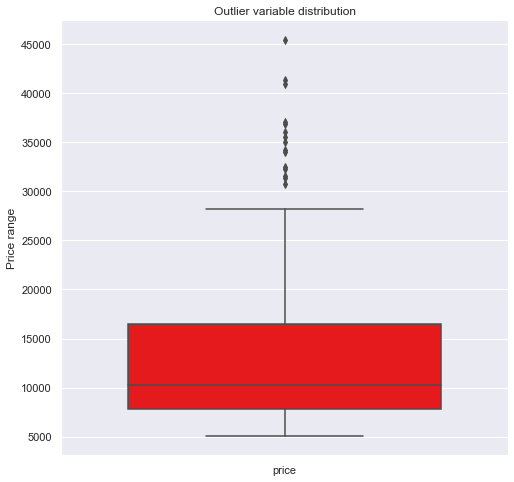

In [12]:
#Outlier analysis, target variable with maximum amount of inconsistency
x=['price']
plt.figure(figsize=(8,8))

sns.boxplot(data=df[x], orient="v", palette="Set1",whis=1.5 ,saturation=1, width=0.7)
plt.title('Outlier variable distribution')
plt.ylabel('Price range')
plt.show()

There are some cars priced over $30000, instead of removing them, we'll apply some standarization scaling

In [13]:
df['CarName'] = df['CarName'].str.split(' ', expand=True)

In [14]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df['CarName'] = df['CarName'].replace({'nissan': 'Nissan', 'maxda': 'mazda', 'porcshce': 'porsche', 
                                       'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [16]:
#seperation of Categorical and Numerical columns
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object']).columns

## Data Visualization

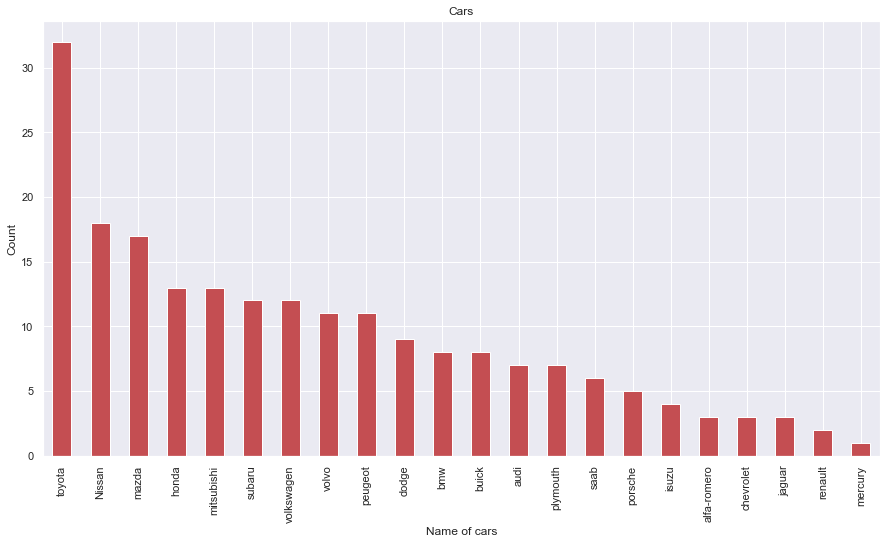

In [17]:
plt.figure(figsize = (15,8))
ax = df.CarName.value_counts().plot(kind= 'bar', color='r')
ax.set_title('Cars')
ax.set_xlabel('Name of cars')
ax.set_ylabel('Count')
plt.show()

In this data set, Toyota is the most frequent and Mercury is the least frequent car.

Text(0.5, 1.0, 'Price distribution')

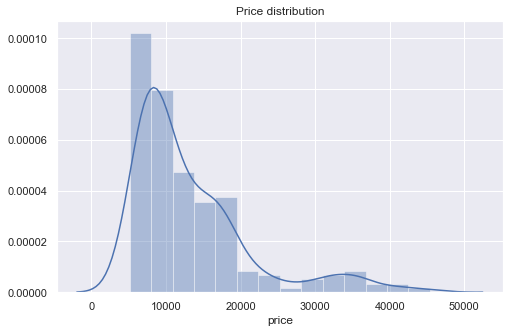

In [18]:
plt.figure(figsize= (8,5))
sns.distplot(df.price)
plt.title('Price distribution')

The plot shows right skew, mean is around \\$13000 and the standard deviation is around \\$8000

In [19]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

We've seen that price shows a posetive correlation with carwidth , carlength, curbweight ,enginesize and horsepower. Here's the scatter plot:

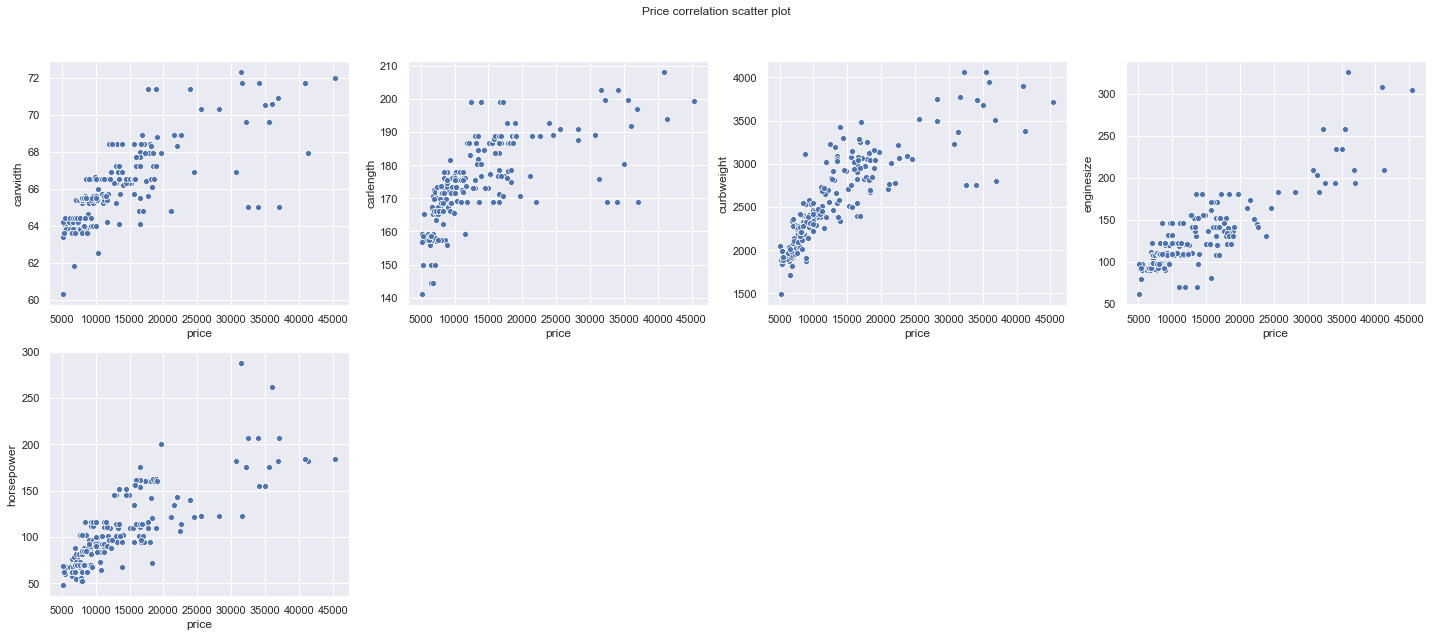

In [20]:
#Scatterplot
posetive_corr = ['carwidth' , 'carlength', 'curbweight' ,'enginesize', 'horsepower']
fig = plt.figure(figsize = (20, 25))
j = 0
for col in posetive_corr:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.scatterplot(df.price, df[col])
    
fig.suptitle('Price correlation scatter plot')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

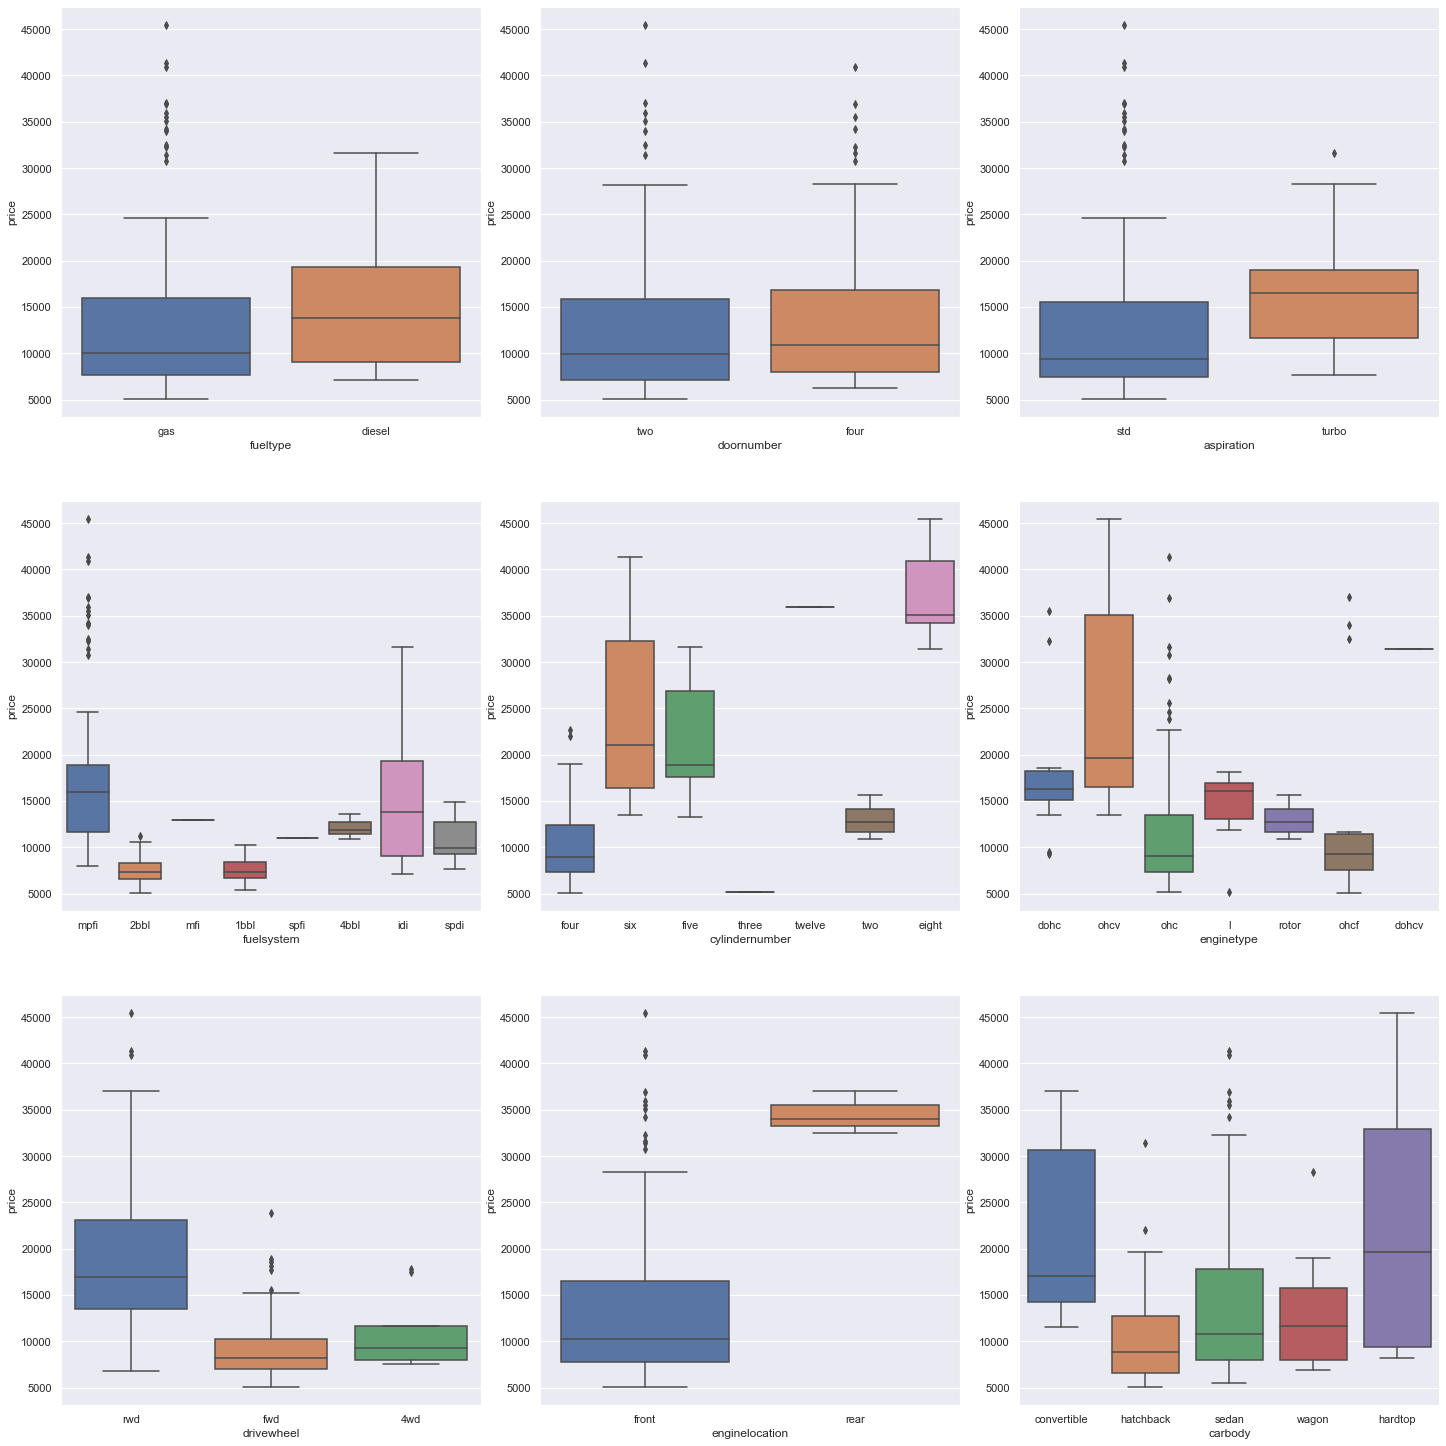

In [21]:
#Boxplot
col = ['fueltype','doornumber', 'aspiration', 'fuelsystem', 'cylindernumber', 
       'enginetype', 'drivewheel', 'enginelocation', 'carbody']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k in col:
    sns.boxplot(x = k, y= 'price', data=df, ax=axs[index])        
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

- Cars with 'fueltype' 'diesel' are more expensive compare to cars with 'fueltype' 'gas'
- Number of doors does not influence car price
- Turbo aspiration usually result in more expensive cars
- Prices are proportional to number of cylinders in most cases
- OHCV enginetype influences higher price
- RWD can be seen in more expensive cars
- Convertible cars are more expensive than all other car types
- Cars with rear enginelocation are much more expensive than cars with front enginelocation

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

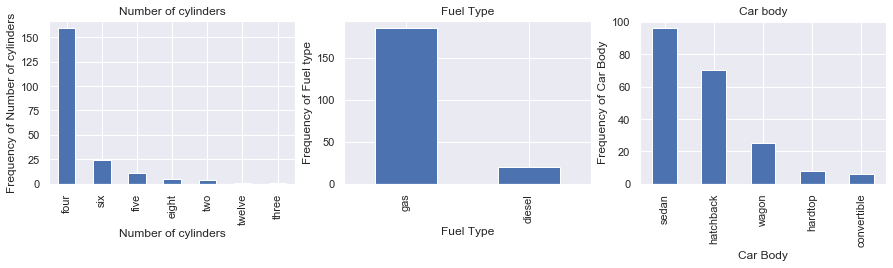

In [22]:
plt.figure(figsize = (15, 3))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot('bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot('bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

- Number of cylinders in most cars is four
- Gas fueled cars are more frequent than diesel fueled cars
- Sedan is the most prefered car type

Text(0.5, 1.0, 'Average price based on car company')

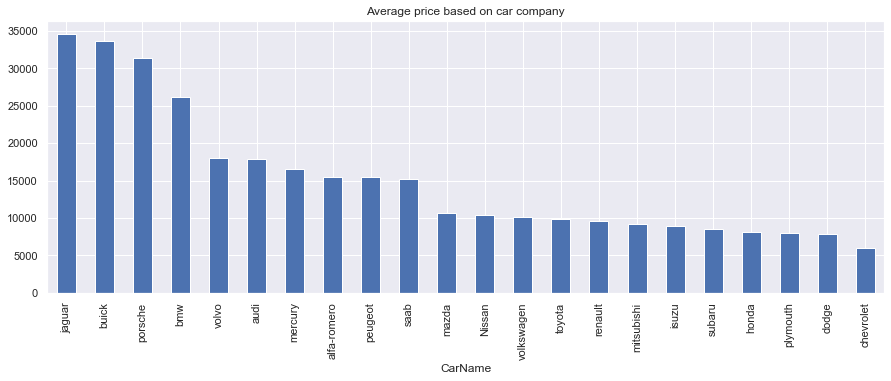

In [23]:
plt.figure(figsize = (15, 5))
carname_grouped = df.groupby(['CarName'])
carname_grouped['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('Average price based on car company')

Text(0.5, 1.0, 'Average price based on car body type')

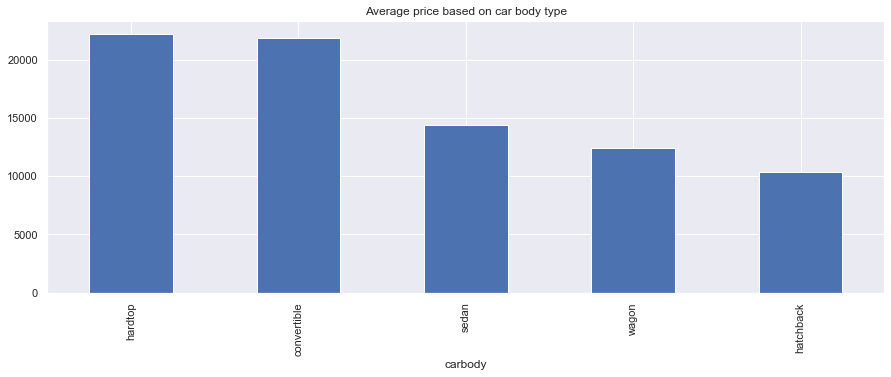

In [24]:
plt.figure(figsize = (15, 5))
carbody_grouped = df.groupby(['carbody'])
carbody_grouped['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('Average price based on car body type')

- Jaguar, Buick and Porsche have the highest average price
- Hardtop and Convertible cars have highest average price

In [105]:
df['price']=df['price'].astype(int)
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','Expensive_Cars']
df['Cars_Category'] = pd.cut(df['price'],bins,right=False,labels=label)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


In [106]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Cars_Category'],
      dtype='object')

In [107]:
df.drop(['carheight', 'stroke', 'compressionratio', 'peakrpm'], axis=1, inplace=True)

## Data Processing

In [108]:
#Converting categorical variables to numerical'fueltype', 'aspiration', 'carbody', 
#'drivewheel', 'enginetype','cylindernumber', 'Cars_Category'
dummy_carcat = pd.get_dummies(df['Cars_Category'], prefix='Car_Cat')
dummy_fueltype = pd.get_dummies(df['fueltype'], prefix='fueltype')

dummy_aspiration = pd.get_dummies(df['aspiration'], prefix='aspiration')

dummy_carbody = pd.get_dummies(df['carbody'], prefix='carbody')

dummy_drivewheel = pd.get_dummies(df['drivewheel'], prefix='drivewheel')

dummy_enginetype = pd.get_dummies(df['enginetype'], prefix='enginetype')

dummy_cylindernumber = pd.get_dummies(df['cylindernumber'], prefix='cylindernumber')
df = df.join([dummy_carcat, dummy_fueltype, dummy_aspiration, dummy_carbody, dummy_drivewheel, dummy_enginetype, dummy_cylindernumber])

In [109]:
cat_cols = ['symboling', 'Cars_Category','fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'CarName', 
            'doornumber', 'enginelocation', 'fuelsystem']
df.drop(cat_cols, axis=1, inplace = True)

In [175]:
np.random.seed(0)
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 100)

In [176]:
#rescaling
scaler = preprocessing.StandardScaler()

In [177]:
#apply scaler to all columns except dummy variables
col_numerical = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
               'horsepower','citympg','highwaympg','price']
df_train[col_numerical] = scaler.fit_transform(df_train[col_numerical])

In [178]:
df_train.head().T

,3,157,81,32,99
car_ID,4.000000,158.000000,82.000000,33.000000,100.000000
wheelbase,0.256524,-0.460676,-0.355720,-0.810530,-0.198286
carlength,0.290980,-0.558965,-0.006088,-1.904025,0.026919
carwidth,0.205880,-0.630100,-0.165667,-0.815873,-0.258553
curbweight,-0.343330,-0.781780,-0.360637,-1.304842,-0.368329
enginesize,-0.372828,-0.652371,-0.042458,-1.135218,-0.093284
boreratio,-0.419206,-0.419206,0.205437,-1.512333,0.127357
horsepower,0.024240,-0.791203,-0.332517,-1.046029,-0.103173
citympg,-0.254620,0.646625,-0.104413,1.848286,0.196003
highwaympg,-0.183655,0.825130,0.104569,1.545690,0.392793


,car_ID,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
car_ID,1.000000,0.124124,0.163344,0.043166,0.068793,-0.020239,0.264177,-0.031473,0.014701,0.009324,...,0.212881,-0.031340,-0.109864,-0.016738,-0.232544,0.205935,0.001012,-0.104929,-0.064263,-0.109864
wheelbase,0.124124,1.000000,0.869983,0.783199,0.779234,0.561150,0.452273,0.348174,-0.460559,-0.522967,...,-0.152147,0.112863,-0.083903,0.124162,0.306522,-0.356993,0.249452,-0.136103,0.050235,-0.083903
carlength,0.163344,0.869983,1.000000,0.836833,0.876835,0.691094,0.603726,0.546998,-0.664545,-0.688816,...,-0.080383,0.210632,-0.053152,0.147857,0.302931,-0.440270,0.336322,-0.206659,0.120388,-0.053152
carwidth,0.043166,0.783199,0.836833,1.000000,0.859037,0.729659,0.548982,0.651416,-0.632303,-0.656102,...,-0.096828,0.300791,-0.004164,0.364109,0.431178,-0.550022,0.258465,-0.198500,0.176185,-0.004164
curbweight,0.068793,0.779234,0.876835,0.859037,1.000000,0.864155,0.631190,0.752908,-0.741448,-0.774536,...,-0.069054,0.370921,-0.031709,0.283886,0.284642,-0.600283,0.456958,-0.154770,0.216063,-0.031709
enginesize,-0.020239,0.561150,0.691094,0.729659,0.864155,1.000000,0.574091,0.823096,-0.641096,-0.655761,...,-0.024503,0.496673,-0.205612,0.346886,0.164676,-0.617968,0.572318,-0.124746,0.402737,-0.205612
boreratio,0.264177,0.452273,0.603726,0.548982,0.631190,0.574091,1.000000,0.551212,-0.568396,-0.562932,...,0.390712,0.079816,0.020137,0.171931,-0.002366,-0.165633,0.147854,-0.118455,0.074191,0.020137
horsepower,-0.031473,0.348174,0.546998,0.651416,0.752908,0.823096,0.551212,1.000000,-0.788538,-0.758523,...,0.035870,0.419297,0.034051,0.341882,0.138645,-0.662090,0.552725,-0.105883,0.321251,0.034051
citympg,0.014701,-0.460559,-0.664545,-0.632303,-0.741448,-0.641096,-0.568396,-0.788538,1.000000,0.972878,...,-0.034027,-0.310697,-0.212446,-0.191955,-0.244782,0.566033,-0.402776,0.250655,-0.149360,-0.212446
highwaympg,0.009324,-0.522967,-0.688816,-0.656102,-0.774536,-0.655761,-0.562932,-0.758523,0.972878,1.000000,...,-0.060393,-0.325922,-0.188541,-0.195560,-0.274483,0.573180,-0.396059,0.245233,-0.161125,-0.188541


---------------------------------------------------------------------------
Highest correlation


highwaympg               citympg                    0.972878
curbweight               carlength                  0.876835
carlength                wheelbase                  0.869983
enginesize               curbweight                 0.864155
price                    enginesize                 0.863012
curbweight               carwidth                   0.859037
price                    curbweight                 0.845345
carwidth                 carlength                  0.836833
horsepower               enginesize                 0.823096
price                    horsepower                 0.812607
carwidth                 wheelbase                  0.783199
Car_Cat_Expensive_Cars   price                      0.781674
curbweight               wheelbase                  0.779234
price                    carwidth                   0.762071
horsepower               curbweight                 0.752908
enginesize               carwidth                   0.729659
                        

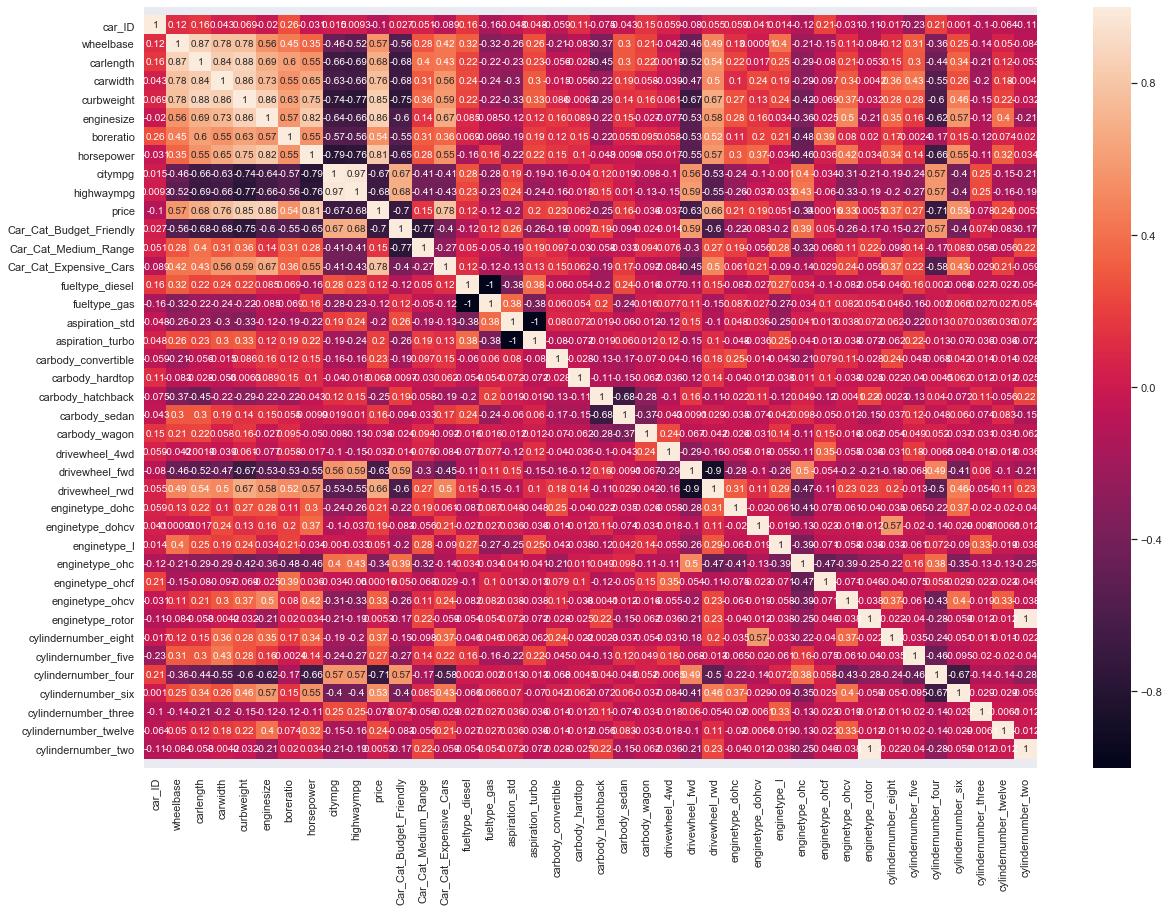

In [179]:
ExploreCorrelation(df_train,0.5, True, True)

In [180]:
y_train = df_train['price']
X_train = df_train

### Building a Linear Model

In [116]:
#hourse power has the highest correlation with price
# Calculate the correlation matrix

cm = df[['horsepower', 'price']].corr()
cm


,horsepower,price
horsepower,1.000000,0.808138
price,0.808138,1.000000


In [117]:
X_train_1 = X_train['horsepower']

In [119]:
# Create the first fitted model
import statsmodels.formula.api as sm
model_1 = sm.ols(formula='y_train ~ X_train_1', data=df_train).fit()

In [120]:
intercept, slope = model_1.params
print('Intercept: ', intercept, 'Slope: ', slope)

Intercept:  8.673617379884035e-17 Slope:  0.8061819474335822


In [121]:
df_train['y_est_1'] = intercept + slope * df_train['horsepower']

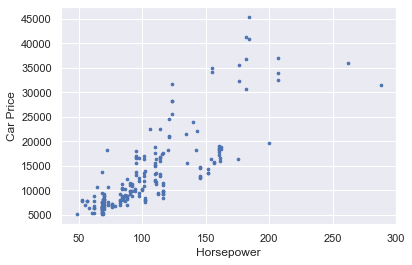

In [122]:
plt.scatter(df.horsepower, df.price, s = 7, label = 'observation')
plt.xlabel('Horsepower')
plt.ylabel('Car Price')
plt.show()

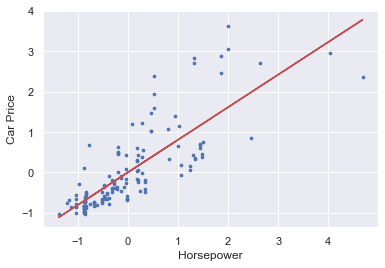

In [123]:
#plotting scaled values
plt.scatter(df_train.horsepower, df_train.price, s = 7, label = 'observation')
plt.plot(df_train.horsepower, df_train.y_est_1,'r-', label = 'Regression line')
plt.xlabel('Horsepower')
plt.ylabel('Car Price')
plt.show()

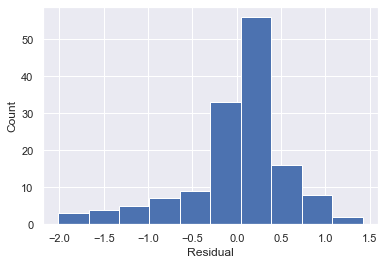

count    1.430000e+02
mean     1.490649e-16
std      5.937474e-01
min     -2.014292e+00
25%     -1.632873e-01
50%      1.240869e-01
75%      3.032260e-01
max      1.419036e+00
Name: Residual_1, dtype: float64

In [124]:
df_train['Residual_1'] = df_train['y_est_1'] - df_train['price']
plt.hist(df_train['Residual_1'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
df_train['Residual_1'].describe()

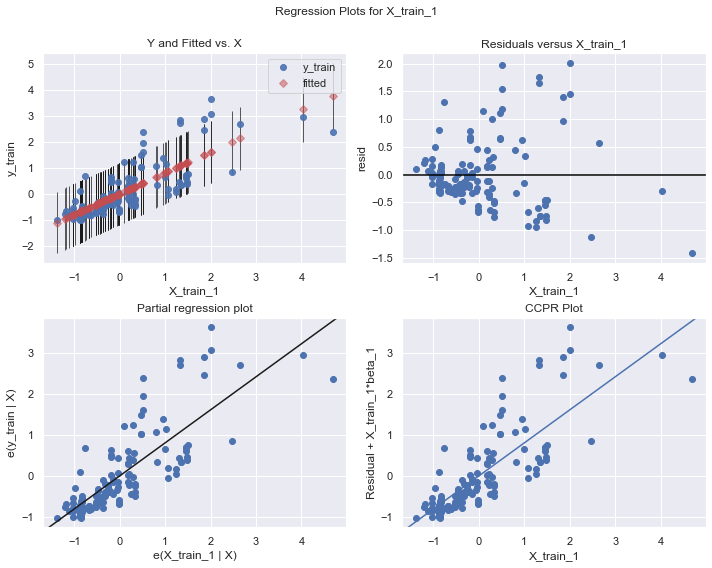

In [125]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(model_1, 'X_train_1', fig = fig)

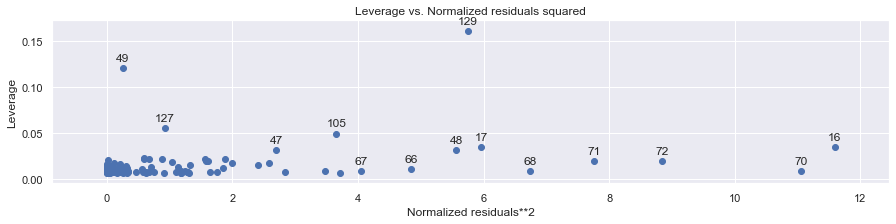

In [126]:
fig, ax1 = plt.subplots(figsize = (15, 3))
fig = plot_leverage_resid2(model_1, ax = ax1)

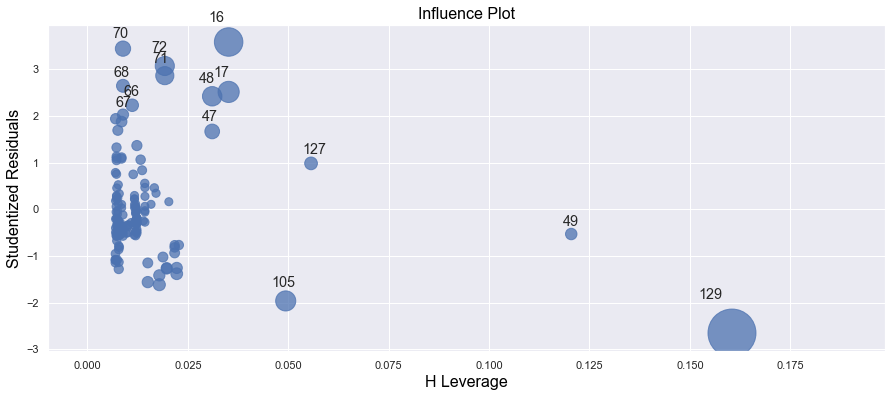

In [127]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(model_1, ax = ax)

In [128]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           6.05e-34
Time:                        08:55:03   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.674e-17      0.050   1.74e-15      1.000      -0.099       0.099
X_train_1      0.8062      0.050     16.179      0.000       0.708       0.905
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.578
Skew:                           1.166   Prob(JB):                     2.32e-12
Kurtosis:                       4.886   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding the second variable to the model

In [129]:
cm = df[['horsepower', 'curbweight', 'price']].corr()
cm

,horsepower,curbweight,price
horsepower,1.000000,0.750739,0.808138
curbweight,0.750739,1.000000,0.835305
price,0.808138,0.835305,1.000000


In [130]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [131]:
model_2 = sm.ols(formula='y_train ~ X_train_2', data=df_train).fit()

In [132]:
 model_2.params

Intercept       8.673617e-17
X_train_2[0]    3.580598e-01
X_train_2[1]    5.898214e-01
dtype: float64

In [133]:
intercept, horsepower, curbweight = model_2.params
print('Intercept: ', intercept, 'horsepower slope: ', horsepower, 'curbweight slope: ', curbweight)

Intercept:  8.673617379884035e-17 horsepower slope:  0.35805982236304634 curbweight slope:  0.5898214099968595


In [134]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           3.34e-49
Time:                        08:55:13   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.674e-17      0.038   2.28e-15      1.000      -0.075       0.075
X_train_2[0]     0.3581      0.059      6.114      0.000       0.242       0.474
X_train_2[1]     0.5898      0.059     10.071      0.000       0.474       0.706
==============================================================================
Omnibus:                       31.547   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.026
Skew:                           0.921   Prob(JB):                     6.22e-16
Kurtosis:                       5.891   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding third variable to the model

In [135]:
cm = df[['horsepower', 'curbweight', 'enginesize', 'price']].corr()
cm

,horsepower,curbweight,enginesize,price
horsepower,1.000000,0.750739,0.809769,0.808138
curbweight,0.750739,1.000000,0.850594,0.835305
enginesize,0.809769,0.850594,1.000000,0.874145
price,0.808138,0.835305,0.874145,1.000000


In [136]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [137]:
model_3 = sm.ols(formula='y_train ~ X_train_3', data=df_train).fit()

In [138]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           2.16e-51
Time:                        08:55:20   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.021e-17      0.036    2.5e-15      1.000      -0.071       0.071
X_train_3[0]     0.2288      0.064      3.589      0.000       0.103       0.355
X_train_3[1]     0.3938      0.073      5.385      0.000       0.249       0.538
X_train_3[2]     0.3400      0.083      4.114      0.000       0.177       0.503
==============================================================================
Omnibus:                       25.598   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.392
Skew:                           0.751   Prob(JB):                     9.37e-13
Kurtosis:                       5.653   Cond. No.                         4.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Recursive feature elimination

In [181]:
X_train.head().T

,3,157,81,32,99
car_ID,4.000000,158.000000,82.000000,33.000000,100.000000
wheelbase,0.256524,-0.460676,-0.355720,-0.810530,-0.198286
carlength,0.290980,-0.558965,-0.006088,-1.904025,0.026919
carwidth,0.205880,-0.630100,-0.165667,-0.815873,-0.258553
curbweight,-0.343330,-0.781780,-0.360637,-1.304842,-0.368329
enginesize,-0.372828,-0.652371,-0.042458,-1.135218,-0.093284
boreratio,-0.419206,-0.419206,0.205437,-1.512333,0.127357
horsepower,0.024240,-0.791203,-0.332517,-1.046029,-0.103173
citympg,-0.254620,0.646625,-0.104413,1.848286,0.196003
highwaympg,-0.183655,0.825130,0.104569,1.545690,0.392793


In [182]:
# Running RFE with the output number of the variable equal to 15
X_train.drop('price', 1, inplace = True)
lm = LinearRegression().fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [183]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 25),
 ('wheelbase', False, 10),
 ('carlength', False, 23),
 ('carwidth', False, 16),
 ('curbweight', False, 3),
 ('enginesize', False, 11),
 ('boreratio', False, 7),
 ('horsepower', True, 1),
 ('citympg', False, 13),
 ('highwaympg', False, 8),
 ('Car_Cat_Budget_Friendly', True, 1),
 ('Car_Cat_Medium_Range', True, 1),
 ('Car_Cat_Expensive_Cars', True, 1),
 ('fueltype_diesel', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_std', False, 5),
 ('aspiration_turbo', True, 1),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 17),
 ('drivewheel_4wd', False, 22),
 ('drivewheel_fwd', False, 12),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 24),
 ('enginetype_rotor', False, 2),
 ('cylindernumber_eight

In [184]:
col_sup = X_train.columns[rfe.support_]
col_sup = col_sup[:-2]
col_sup

Index(['horsepower', 'Car_Cat_Budget_Friendly', 'Car_Cat_Medium_Range',
       'Car_Cat_Expensive_Cars', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_turbo', 'carbody_convertible', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf'],
      dtype='object')

In [143]:
'''web = np.array(['curbweight',  'Cars_Category_TopNotch_Cars', 'carbody_hardtop',
                'carbody_hatchback', 
                'carbody_sedan',
       'carbody_wagon',  'enginetype_ohc','enginetype_ohcv', 'cylindernumber_five', 
                ',
       '', '']) 

me = np.array(['wheelbase',  'enginesize',  'carbody_convertible', 'enginetype_dohc',
       , 'enginetype_l', '',
       '', 'cylindernumber_three', ''])
web- me'''

"web = np.array(['curbweight',  'Cars_Category_TopNotch_Cars', 'carbody_hardtop',\n                'carbody_hatchback', \n                'carbody_sedan',\n       'carbody_wagon',  'enginetype_ohc','enginetype_ohcv', 'cylindernumber_five', \n                ',\n       '', '']) \n\nme = np.array(['wheelbase',  'enginesize',  'carbody_convertible', 'enginetype_dohc',\n       , 'enginetype_l', '',\n       '', 'cylindernumber_three', ''])\nweb- me"

In [144]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

In [145]:
import statsmodels.api as sm
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     89.58
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           6.13e-58
Time:                        08:55:46   Log-Likelihood:                -38.079
No. Observations:                 143   AIC:                             104.2
Df Residuals:                     129   BIC:                             145.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Variance Inflation Factor

In [146]:
#to avoid multicollinearity, we can use VIF to avoid using corelated predictors in the model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,14.51
3,enginesize,10.89
8,fueltype_gas,10.09
10,cylindernumber_four,10.03
0,carlength,8.80
1,carwidth,6.23
5,horsepower,5.89
7,Car_Cat_Expensive_Cars,3.45
6,Car_Cat_Medium_Range,3.23
9,carbody_hatchback,2.47


As a rule of thumb, we usually preffer predictors having value smaller than 5 for VIF. First, variables with p_values greater than 0.05 are going to be dropped. 

In [147]:
#Dropping the variable and updating the model
import statsmodels.api as sm
X_train_rfe1 = X_train_rfe.drop('carlength', 1,)

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     97.79
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           6.07e-59
Time:                        08:55:59   Log-Likelihood:                -38.082
No. Observations:                 143   AIC:                             102.2
Df Residuals:                     130   BIC:                             140.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,10.87
1,curbweight,10.41
9,cylindernumber_four,9.87
7,fueltype_gas,9.28
4,horsepower,5.33
0,carwidth,4.72
6,Car_Cat_Expensive_Cars,3.29
5,Car_Cat_Medium_Range,3.22
3,boreratio,2.33
11,cylindernumber_two,2.12


In [150]:
import statsmodels.api as sm
X_train_rfe2 = X_train_rfe1.drop('Car_Cat_Medium_Range', 1,)

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.71e-60
Time:                        08:56:50   Log-Likelihood:                -38.083
No. Observations:                 143   AIC:                             100.2
Df Residuals:                     131   BIC:                             135.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [151]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,10.84
8,cylindernumber_four,9.58
1,curbweight,9.17
6,fueltype_gas,8.48
4,horsepower,5.30
0,carwidth,4.64
3,boreratio,2.33
5,Car_Cat_Expensive_Cars,2.25
10,cylindernumber_two,2.00
7,carbody_hatchback,1.98


In [155]:
X_train_rfe3 = X_train_rfe2.drop('cylindernumber_four', 1,)

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.0
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.57e-61
Time:                        08:58:26   Log-Likelihood:                -38.181
No. Observations:                 143   AIC:                             98.36
Df Residuals:                     132   BIC:                             131.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,9.80
1,curbweight,8.82
0,carwidth,4.64
4,horsepower,3.74
5,Car_Cat_Expensive_Cars,2.24
6,fueltype_gas,1.91
7,carbody_hatchback,1.86
3,boreratio,1.74
9,cylindernumber_two,1.49
8,cylindernumber_twelve,1.43


In [156]:
X_train_rfe4 = X_train_rfe3.drop('boreratio', 1,)

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     131.8
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           8.56e-62
Time:                        08:58:41   Log-Likelihood:                -38.835
No. Observations:                 143   AIC:                             97.67
Df Residuals:                     133   BIC:                             127.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,9.23
0,carwidth,5.65
7,drivewheel_fwd,5.51
3,Car_Cat_Budget_Friendly,5.03
2,horsepower,4.67
5,fueltype_diesel,2.08
4,Car_Cat_Medium_Range,1.82
6,aspiration_turbo,1.72
8,enginetype_dohcv,1.58


In [157]:
X_train_rfe5 = X_train_rfe4.drop('fueltype_gas', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           2.88e-62
Time:                        08:59:00   Log-Likelihood:                -40.388
No. Observations:                 143   AIC:                             98.78
Df Residuals:                     134   BIC:                             125.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [158]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,9.58
1,curbweight,8.57
0,carwidth,4.46
3,horsepower,3.72
4,Car_Cat_Expensive_Cars,1.88
7,cylindernumber_two,1.47
6,cylindernumber_twelve,1.39
5,carbody_hatchback,1.28


In [159]:
X_train_rfe6 = X_train_rfe5.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           2.74e-62
Time:                        08:59:43   Log-Likelihood:                -43.101
No. Observations:                 143   AIC:                             102.2
Df Residuals:                     135   BIC:                             125.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,7.99
2,enginesize,7.90
0,carwidth,4.46
3,horsepower,3.72
4,Car_Cat_Expensive_Cars,1.87
6,cylindernumber_two,1.41
5,carbody_hatchback,1.28


In [161]:
X_train_rfe7 = X_train_rfe6.drop('cylindernumber_two', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.04e-62
Time:                        09:00:06   Log-Likelihood:                -46.557
No. Observations:                 143   AIC:                             107.1
Df Residuals:                     136   BIC:                             127.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,7.55
2,enginesize,6.13
0,carwidth,4.46
3,horsepower,3.41
4,Car_Cat_Expensive_Cars,1.84
5,carbody_hatchback,1.22


In [163]:
X_train_rfe8 = X_train_rfe7.drop('enginesize', 1,)


X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()


print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.09e-62
Time:                        09:01:00   Log-Likelihood:                -47.824
No. Observations:                 143   AIC:                             107.6
Df Residuals:                     137   BIC:                             125.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [164]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,5.82
0,carwidth,4.40
2,horsepower,2.53
3,Car_Cat_Expensive_Cars,1.59
4,carbody_hatchback,1.18


In [165]:
X_train_rfe9 = X_train_rfe8.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     220.4
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           7.13e-59
Time:                        09:01:57   Log-Likelihood:                -59.916
No. Observations:                 143   AIC:                             129.8
Df Residuals:                     138   BIC:                             144.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [166]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,2.32
1,horsepower,1.97
2,Car_Cat_Expensive_Cars,1.56
3,carbody_hatchback,1.09


In [167]:
y_train_price = lm_rfe9.predict(X_train_rfe9c)

Text(0.5, 0, 'Errors')

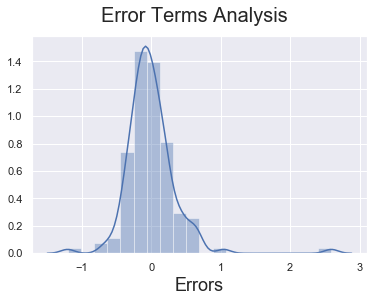

In [168]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Making Predictions Using the Final Model

In [169]:
df_test[col_numerical] = scaler.transform(df_test[col_numerical])
df_test.shape

(62, 40)

In [170]:
y_test = df_test.pop('price')
X_test = df_test

In [171]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe9c.columns]

In [172]:
y_pred = lm_rfe9.predict(X_test_new)

Text(0, 0.5, 'y_pred')

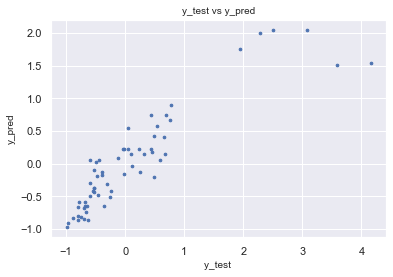

In [173]:
plt.scatter(y_test,y_pred, s = 7)
plt.title('y_test vs y_pred', fontsize=10)   
plt.xlabel('y_test ', fontsize=10)                       
plt.ylabel('y_pred', fontsize=10)  

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7716073986157159

The R_square score of Training set is 0.865 and Test set is 0.77 which are  close. We can conclude that our model is good enough to predict the Car prices using selected predictor variables